# NADİR KULLANILAN GÖRSELLEŞTİRME ARAÇLARI

<font color = "Olive"><br>
Amaçlarımızı doğru bir şekilde uyarlayabildiğimiz görselleştirme aracını tespit edebilmemiz önemlidir. Yaygın kullanılan görselleştirme araçları isteklerimizi karşılayamayabilir. Dolayısıyla diğer görselleştirme araçlarını da öğrenmemizde fayda var.
    
Öğreneceğimiz görselleştirme araçları şu şekildedir:

    🟡Matrix and Box Plots (Missingno)

    🟡Parallel Plots (Pandas)

    🟡Network Charts (Networkx)

    🟡Venn (Matplotlib)

    🟡Donut (Matplotlib)

    🟡Spider Chart (Matplotlib)

    🟡Cluster Map (Seaborn)

    🟡Inset Plots (Plotly)

    🟡Basic 3D Scatter Plot (Plotly)

# Matrix and Box Plots (Missingno)

Data'lar genelde kirli olurlar ve içerisinde missing value'ler bulunur. Bu missing value'leri ayırt etmemiz ve temizlememiz gerekir. info() metodu ile veri seti içeriğine göz atabilmemiz mümkün. Ama görselleştirme anlaşılabilirlik ve etkileyicilik açısından daha kullanışlıdır. 

Missing value'leri (Nan value veya boş değer gibi) görselleştirebiliyorsak anlaşılabilirlik açısından daha verimli olur. Bunu görselleştirebilmek için missingno kütüphanesinden faydalanabiliriz.

Öncelikle kütüphaneleri import edelim.

In [3]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly --upgrade

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install matplotlib-venn

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32154 sha256=92b688e4c97eecd51250760e28e11f9a94940bbabb2d17e17dad348f35370253
  Stored in directory: c:\users\raziy\appdata\local\pip\cache\wheels\32\41\5f\d0f29cd092d042d8e8a87d7bbe42193166aa555ff38b377343
Successfully built matplotlib-venn


In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
import matplotlib_venn as venn
from math import pi
from pandas.plotting import parallel_coordinates

Bir data frame oluşturmak için önce dictionary oluştururuz. Şimdi bir data frame oluşturalım:

In [10]:
dictionary = {"column1":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              "column2":[1,2,3,4,np.nan,6,7,8,np.nan,10,np.nan,12,13,14,15,16,np.nan,18,np.nan,20],
              "column3":[1,2,3,4,np.nan,6,7,8,9,10,11,12,13,np.nan,15,16,17,18,np.nan,20]}

data frame içerisine np.nan şeklinde nan value'ler ekledim.

In [12]:
data_missingno = pd.DataFrame(dictionary)
data_missingno

,column1,column2,column3
0,1,1.0,1.0
1,2,2.0,2.0
2,3,3.0,3.0
3,4,4.0,4.0
4,5,NaN,NaN
5,6,6.0,6.0
6,7,7.0,7.0
7,8,8.0,8.0
8,9,NaN,9.0
9,10,10.0,10.0


Çıktıda gördüğünüz üzere column1, column2 ve column3 isimli featureler var ve NaN değerler mevcut. Bunları görselleştirelim.

In [14]:
conda install -c conda-forge/label/gcc7 missingno

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\raziy\anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    ------------------------------------------------------------
                                           Total:          10 KB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/label/gcc7/noarch::missingno-0.4.1-py_0




missingno-0.4.1      | 10 KB     |            |   0% 
missingno-0.4.1      | 10 KB     | ########## | 100% 
missingno-0.4.1      | 10 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


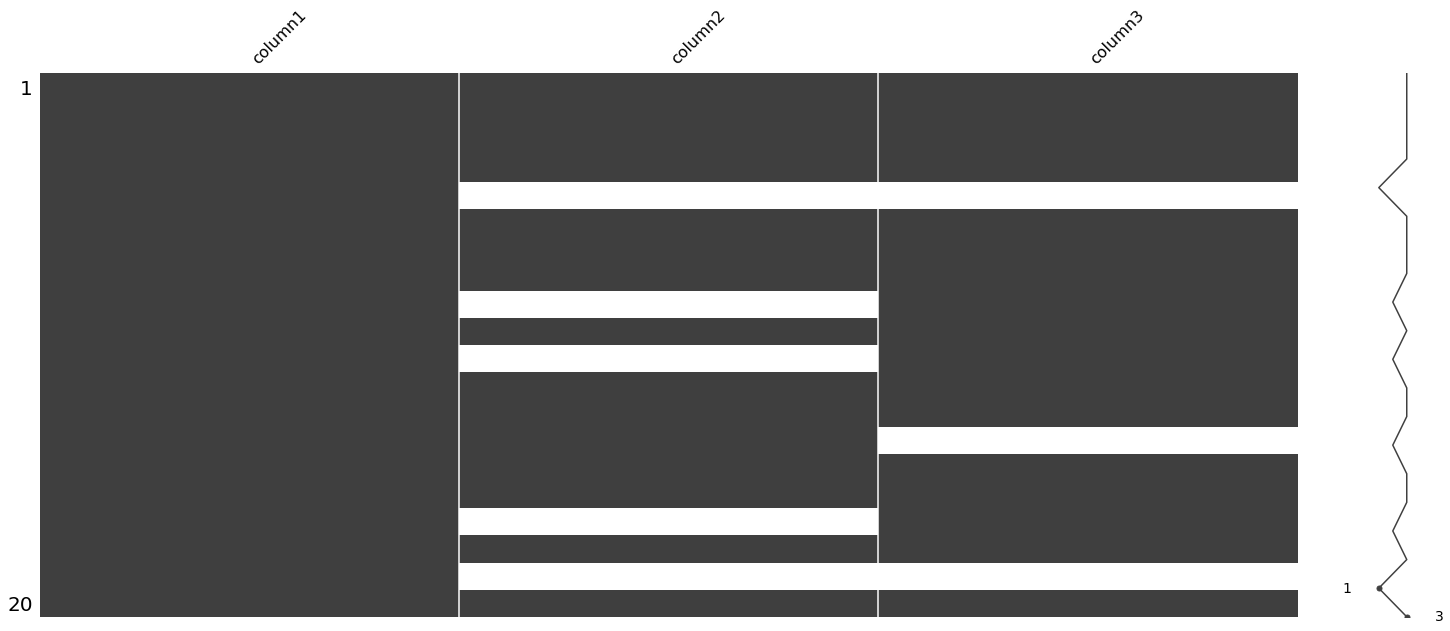

In [15]:
import missingno as msno
msno.matrix(data_missingno)
plt.show()

Çıktıyı yorumlayalım.

Eğer data frame'de o anki sample'deki değer NaN değil de normal bir değer ise siyah bar olarak görüntülenir. Eğer NaN value ise beyaz bar olarak görüntülenir.

Çıktıda column1'in tamamı siyah ve data frame'e baktığımızda column1'de hiç NaN değer olmadığını görüyoruz.

column2 için 5 tane beyaz bar var ve data frame'de 5 tane NaN değer var.

column3 için 3 tane beyaz bar var ve data frame'de 3 tane NaN değer var.

Sağ taraftaki çizgi, bir satırda kaç tane dolu olduğunu yani NaN olmadığını gösterir. 3 hizzasına baktığımızda, o hizzada 3 tane değer var ve bu 3 değer NaN değil. 1 yazan yere baktığımızda, 3 tane değer var (column1, column2 ve column3) ve 1 tanesi NaN değil, diğer 2 tanesi NaN.

Siyah barlar gerçek value, beyaz barlar NaN value'dir.

Böylelikle data frame içerisindeki NaN value'leri görselleştirmiş olduk.

NaN value'leri görselleştirmek için yukarıda kullandığımız matrix plot yerine bar plot'da kullanabiliriz.

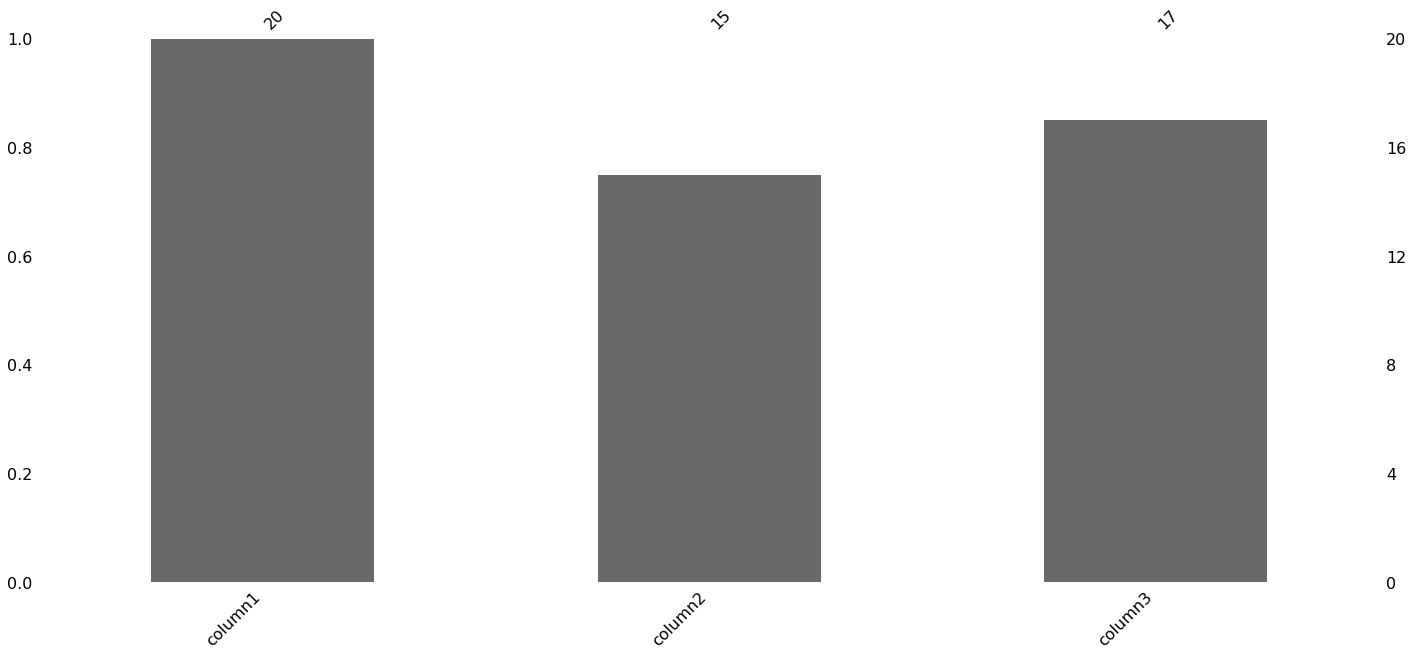

In [16]:
# missingno bar plot
msno.bar(data_missingno)
plt.show()

Çıktıyı yorumlayalım. 

column1'i ifade eden bar'a bakınız. Üstünde 20 tane değer olduğunu belirtiyor. Bar'ın hizzasında 1.0 var ve bunun anlamı, %100 dolu, boş değer yoktur.

column2 'de 15 tane dolu değer vardır. En sağda toplam 20 değer (sample) olduğunu görebiliyoruz ve bu durumda 5 tane boş değer vardır. 5 tane boş değer, 20'de 5 yani %75'e karşılık gelir. %75 doludur.

column3'e baktığımızda, 20 tane sayı olması lazım fakat 17 tane mevcut dolayısıyla 3 tanesi NaN değerdir.